DAY-1
Exploriong datasheet and finzalization of data sheet.
We use UCI Heart Disease Data.

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.


Importing data to phyton

In [ ]:
path='/content/heart_disease_uci.csv'
df=pd.read_csv(path)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
import pandas as pd

**DAY-2: DATA CLEANING**

Appplying data cleaning techninques
1. Checking for Missing Values
2. Handling of Missing Values
3. Removing Duplicates
4. Converting Data Types
5. Normalize or Standardize Numerical Features
6. Identification and removal of ouitliers
7. Saving the Cleaned DataFrame

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
 df.dropna(inplace=True)
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [ ]:
# Convert 'sex' and 'cp' to categorical type
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')

# Check data types
print(df.dtypes)


id             int64
age            int64
sex         category
dataset       object
cp          category
trestbps     float64
chol         float64
fbs           object
restecg       object
thalch       float64
exang         object
oldpeak      float64
slope         object
ca           float64
thal          object
num            int64
dtype: object


**DAY-3 DATA VISULAIZATION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path =path  # Update with your actual path
df = pd.read_csv(data_path)

# Display the first few rows
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


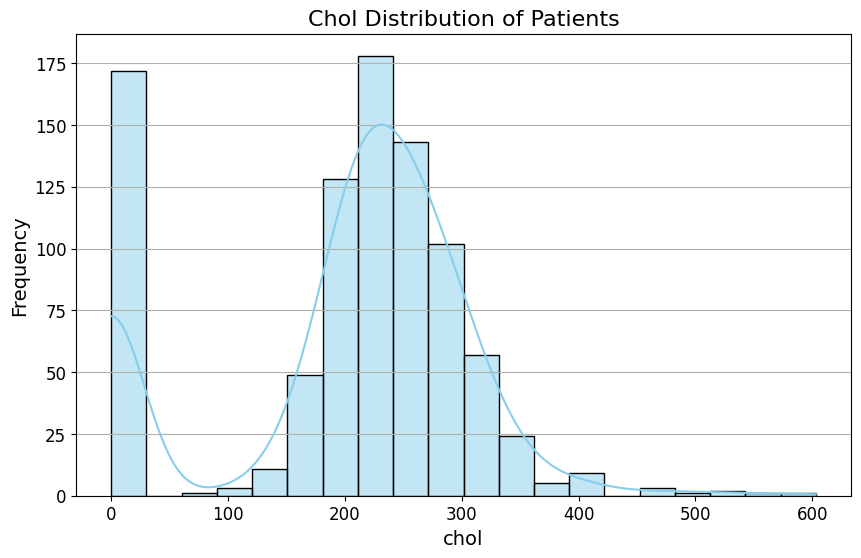

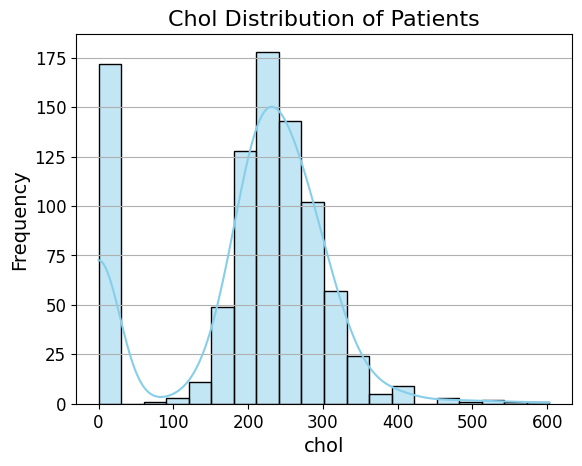

In [ ]:
## Univariate Analysis: Chol Distribution


import matplotlib.pyplot as plt
import seaborn as sns

new_var = plt.figure(figsize=(10, 6))

sns.histplot(df['chol'], bins=20, kde=True, color='skyblue')
plt.title('Chol Distribution of Patients', fontsize=16)
plt.xlabel('chol', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()


sns.histplot(df['chol'], bins=20, kde=True, color='skyblue')
plt.title('Chol Distribution of Patients', fontsize=16)
plt.xlabel('chol', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()

<Axes: xlabel='chol', ylabel='Density'>

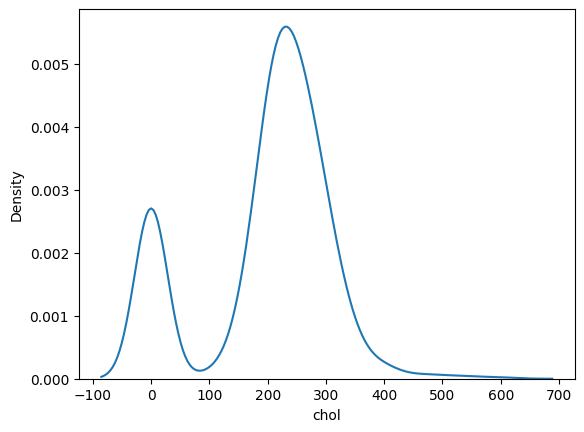

In [ ]:
sns.kdeplot(df["chol"])

<Axes: xlabel='restecg'>

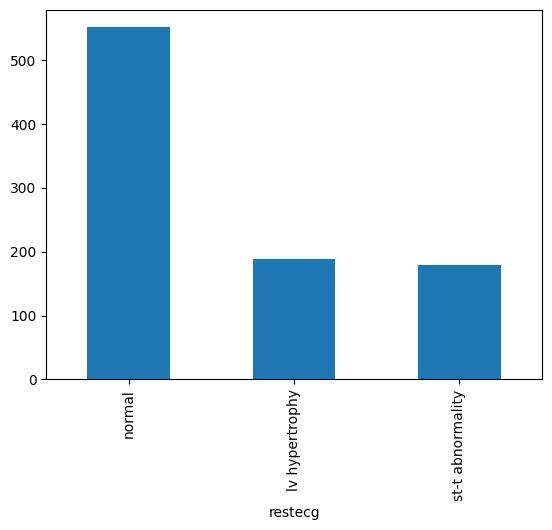

In [ ]:
df['restecg'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

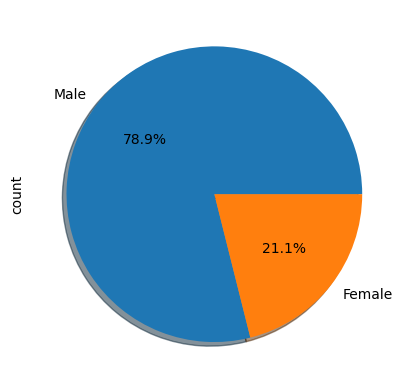

In [ ]:
df['sex'].value_counts().plot(kind='pie', autopct="%0.1f%%", shadow=True)

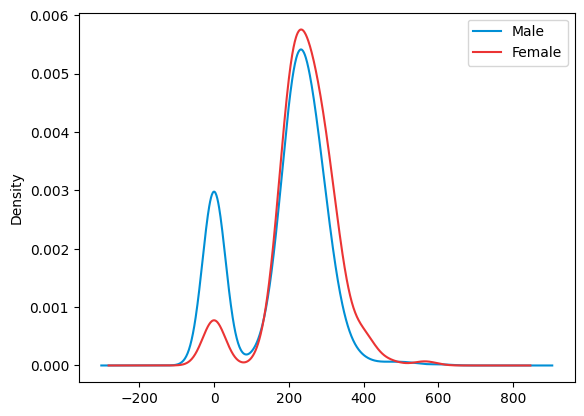

In [ ]:
df[df['sex'] == 'Male']['chol'].plot(kind="kde", label="Male", color="#008fd5")
df[df['sex'] == 'Female']['chol'].plot(kind="kde", label="Female", color="#eb3434")
plt.legend()

<Axes: >

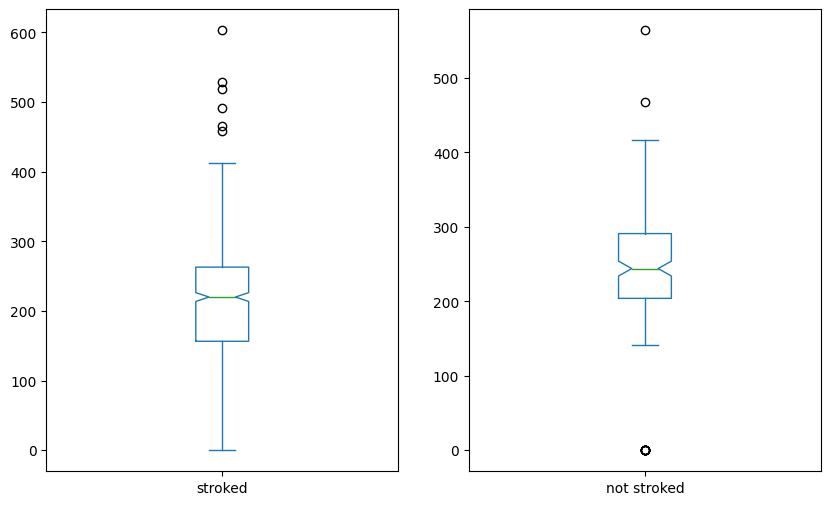

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

df[df["sex"] == "Male"]["chol"].plot(kind="box", notch=True, label="stroked", ax=ax[0])
df[df["sex"] == "Female"]["chol"].plot(kind="box", notch=True, label="not stroked", ax=ax[1])

<Axes: xlabel='restecg', ylabel='sex'>

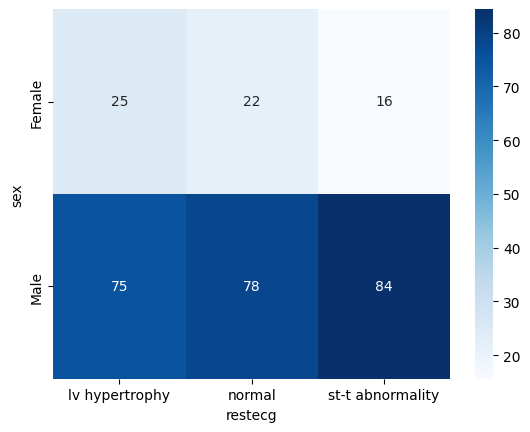

In [ ]:
sns.heatmap(pd.crosstab(df["sex"], df["restecg"], normalize="columns") * 100, cmap="Blues", annot=True)

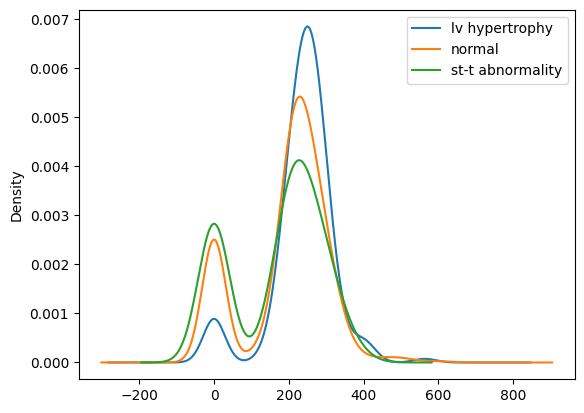

In [ ]:
df.groupby("restecg")["chol"].plot(kind="kde")
plt.legend()

DAY-4: Pulling data from an API source

In [74]:
#Step 1: Pulling Data from a Website/API
#Step 1.1: Install Required Libraries
!pip install requests pandas plotly

Step 1.2: Write the Code to Pull Data
Here’s the code to pull data from the Open Notify API and convert it into a DataFrame:

In [75]:
import requests
import pandas as pd

# Step 1: Define the API endpoint
url = "http://api.open-notify.org/iss-now.json"

# Step 2: Send a GET request to the API
response = requests.get(url)

# Step 3: Check if the request was successful
if response.status_code == 200:
    # Step 4: Parse the JSON data
    data = response.json()

    # Step 5: Extract relevant information
    location = data['iss_position']
    timestamp = data['timestamp']

    # Create a DataFrame
    df = pd.DataFrame({
        'timestamp': [timestamp],
        'latitude': [location['latitude']],
        'longitude': [location['longitude']]
    })

    print("Data Pulled Successfully:")
    print(df)
else:
    print("Failed to retrieve data. Status code:", response.status_code)


Data Pulled Successfully:
    timestamp  latitude longitude
0  1728755708  -42.4476  116.1035


In [76]:
#Step 2: Exploring Descriptive Statistics
#Now that we have the data in a DataFrame, let’s explore some descriptive statistics.
# Exploring Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
          timestamp
count  1.000000e+00
mean   1.728756e+09
std             NaN
min    1.728756e+09
25%    1.728756e+09
50%    1.728756e+09
75%    1.728756e+09
max    1.728756e+09


Step 3: Creating Interactive Graphs with Plotly
Next, let’s create an interactive scatter plot to visualize the ISS location data.

In [77]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(df, x='longitude', y='latitude',
                 title='ISS Current Location',
                 labels={'longitude': 'Longitude', 'latitude': 'Latitude'})

# Show the plot
fig.show()


In [78]:
import requests
import pandas as pd
import plotly.express as px

# Step 1: Define the API endpoint
url = "http://api.open-notify.org/iss-now.json"

# Step 2: Send a GET request to the API
response = requests.get(url)

# Step 3: Check if the request was successful
if response.status_code == 200:
    # Step 4: Parse the JSON data
    data = response.json()

    # Step 5: Extract relevant information
    location = data['iss_position']
    timestamp = data['timestamp']

    # Create a DataFrame
    df = pd.DataFrame({
        'timestamp': [timestamp],
        'latitude': [location['latitude']],
        'longitude': [location['longitude']]
    })

    print("Data Pulled Successfully:")
    print(df)

    # Exploring Descriptive Statistics
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Step 6: Create an interactive scatter plot
    fig = px.scatter(df, x='longitude', y='latitude',
                     title='ISS Current Location',
                     labels={'longitude': 'Longitude', 'latitude': 'Latitude'})

    # Show the plot
    fig.show()

else:
    print("Failed to retrieve data. Status code:", response.status_code)


Data Pulled Successfully:
    timestamp  latitude longitude
0  1728755763  -40.4594  119.8002

Descriptive Statistics:
          timestamp
count  1.000000e+00
mean   1.728756e+09
std             NaN
min    1.728756e+09
25%    1.728756e+09
50%    1.728756e+09
75%    1.728756e+09
max    1.728756e+09
